In [1]:
from fullfrlm import flow_refueling_location_model
from generate_network import generate_network
from flow_computation import flow_computation
from random_vessel_generator import random_vessel_generator
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from visualize_placement import visualize_placement
import pickle
import time


## Load necessary data

In [2]:
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

## Generate random df

In [3]:
%%time
df_chance = df_ivs.copy()
df_random1 = random_vessel_generator(df_chance, 1)

CPU times: total: 141 ms
Wall time: 142 ms



## Compute path flows

In [4]:
%%time
flows = flow_computation(df_random1)

CPU times: total: 609 ms
Wall time: 627 ms


## Generate network

In [5]:
%%time
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
paths = pickle.load(open("data/final_paths.p", "rb"))
G, paths, inserted_nodes = generate_network(G, paths, 30)

CPU times: total: 969 ms
Wall time: 975 ms


In [6]:
%%time
# range r in meters
df_b, df_g, df_eq_fq = first_stage_frlm(100000, G, OD=flows, paths=paths, path_lengths=path_lengths, df_h=df_h, additional_nodes=inserted_nodes)

CPU times: total: 3.12 s
Wall time: 3.28 s


## Run second stage FRLM

In [7]:
%%time
optimal_facilities, optimal_flows, non_zero_flows, supported_flow, routes_supported = second_stage_frlm(100, 10, 5, df_g, df_b, df_eq_fq)

Optimal
CPU times: total: 29.8 s
Wall time: 39.3 s


In [8]:
routes_supported

61

In [ ]:
optimal_facilities

In [ ]:
optimal_flows

In [11]:
sum(optimal_facilities.values())

100.0

In [12]:
sum(optimal_flows.values())

58.41983478400001

In [13]:
supported_flow

522.6226269453737

## Visualize placement

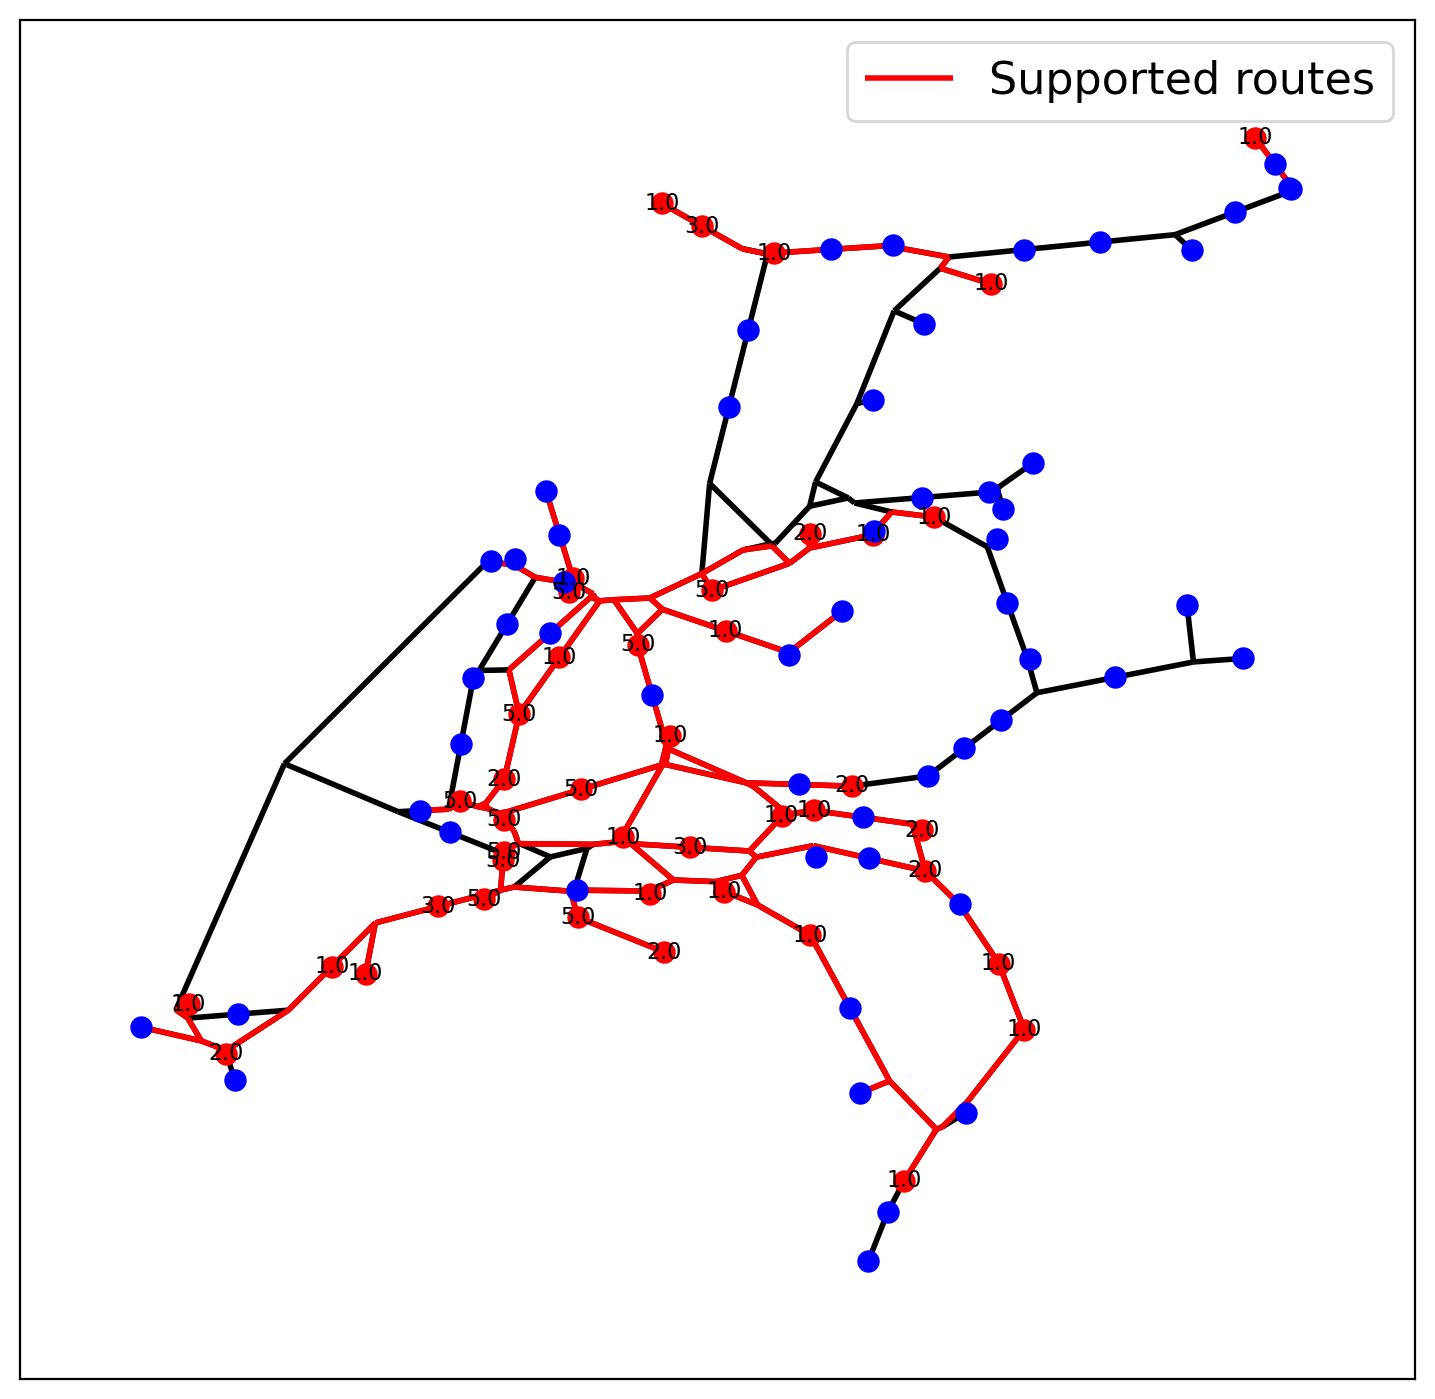

CPU times: total: 406 ms
Wall time: 476 ms


In [14]:
%%time
visualize_placement(G, flows, optimal_facilities, non_zero_flows, df_h, paths, unused=True)

In [18]:
optimal_facilities

{'22637863': 0.0,
 '22638146': 2.0,
 '22638156': 0.0,
 '22638320': 0.0,
 '22638327': 2.0,
 '30984595': 5.0,
 '8861305': 0.0,
 '8861462': 0.0,
 '8861528': 2.0,
 '8861625': 1.0,
 '8861718': 0.0,
 '8862085': 0.0,
 '8862497': 1.0,
 '8862506': 0.0,
 '8862570': 0.0,
 '8862663': 3.0,
 '8863019': 0.0,
 '8863125': 0.0,
 '8863152': 0.0,
 '8863207': 0.0,
 '8863260': 2.0,
 '8863306': 5.0,
 '8863360': 0.0,
 '8863408': 0.0,
 '8863469': 5.0,
 '8863518': 0.0,
 '8863614': 1.0,
 '8863709': 1.0,
 '8863818': 5.0,
 '8863861': 0.0,
 '8863966': 0.0,
 '8864005': 3.0,
 '8864018': 0.0,
 '8864111': 4.0,
 '8864153': 0.0,
 '8864494': 0.0,
 '8864566': 3.0,
 '8864837': 5.0,
 '8864954': 0.0,
 '8865003': 0.0,
 '8865412': 2.0,
 '8865600': 5.0,
 '8865605': 0.0,
 '8865756': 0.0,
 '8865990': 0.0,
 '8866297': 2.0,
 '8866425': 0.0,
 '8866564': 0.0,
 '8866627': 0.0,
 '8866671': 0.0,
 '8866686': 5.0,
 '8866748': 0.0,
 '8866763': 2.0,
 '8866775': 0.0,
 '8866889': 1.0,
 '8866893': 0.0,
 '8867083': 0.0,
 '8867240': 4.0,
 '886725

## Try out complete function

## range 50km

Optimal


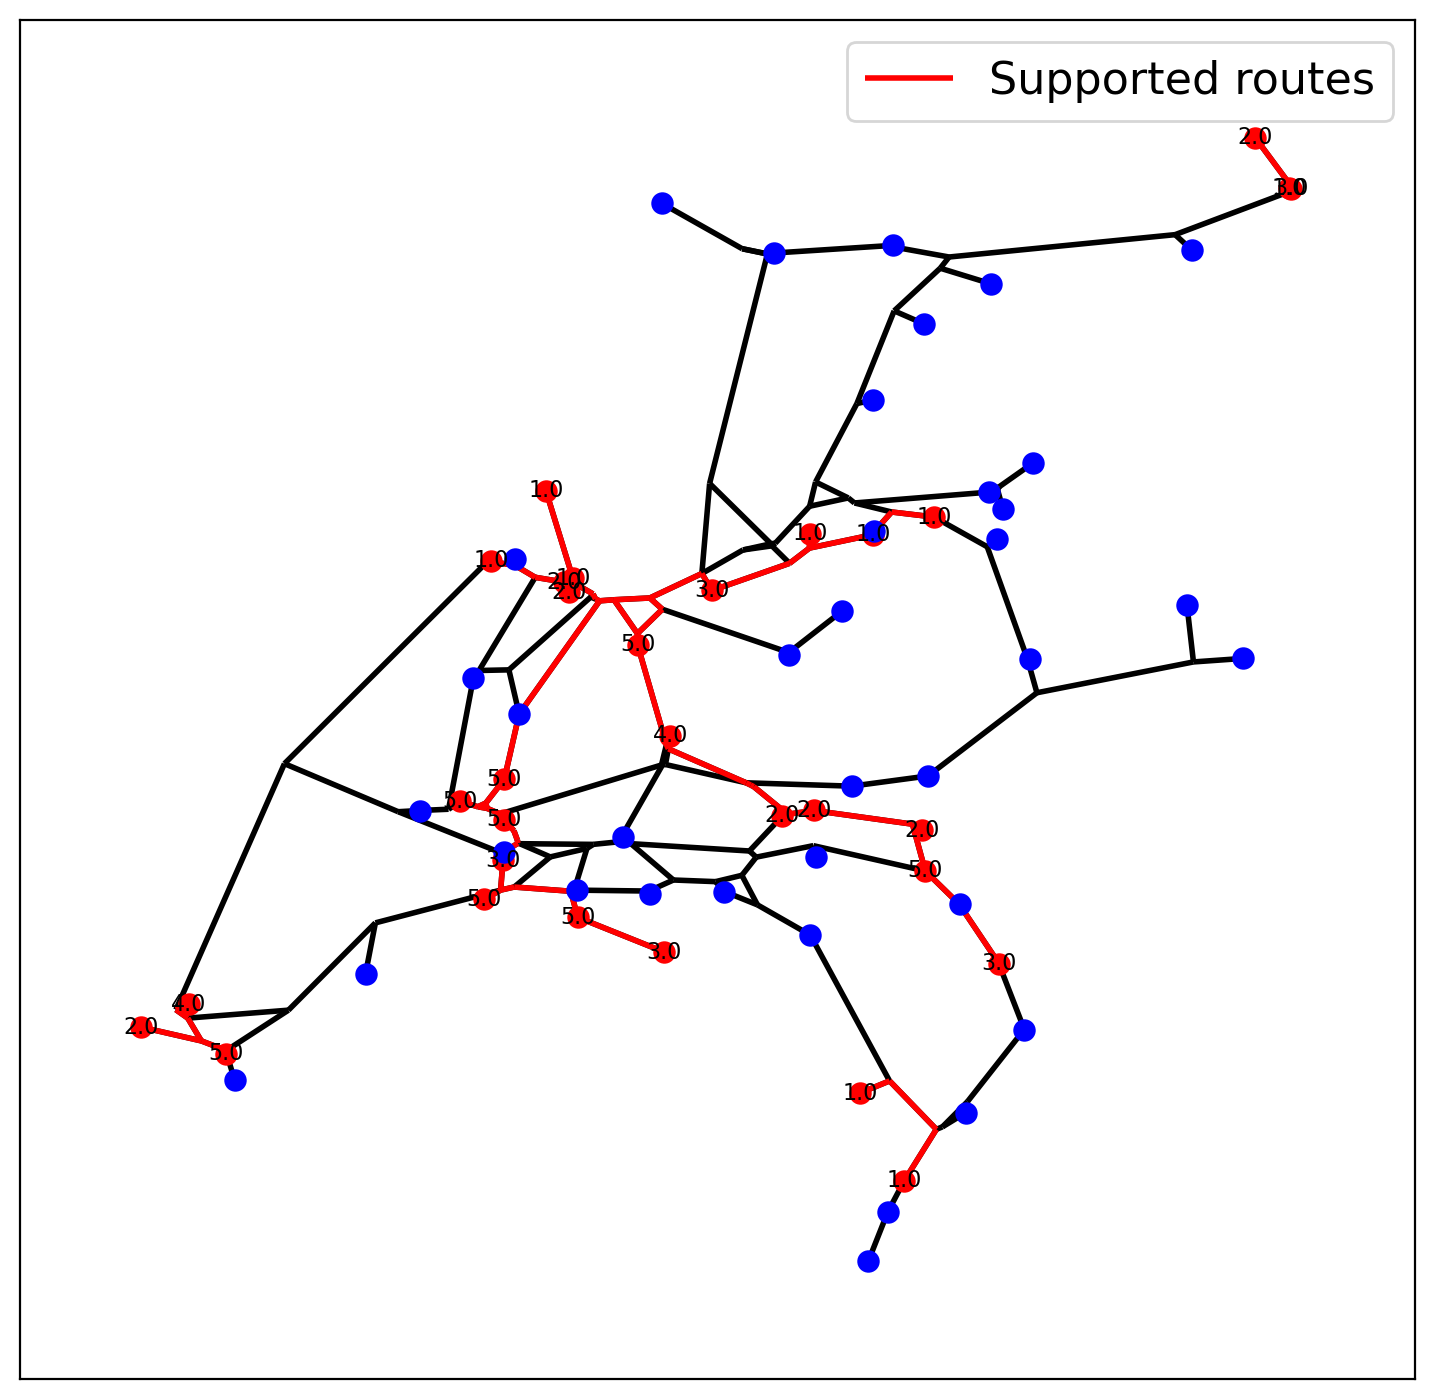

0.15210493673067654

In [15]:
total_flow, supported_fraction, optimal_facilities, non_zero_flows, routes_supported = flow_refueling_location_model(1, 50000, 100, 5, 5, vis=True)
supported_fraction

Optimal


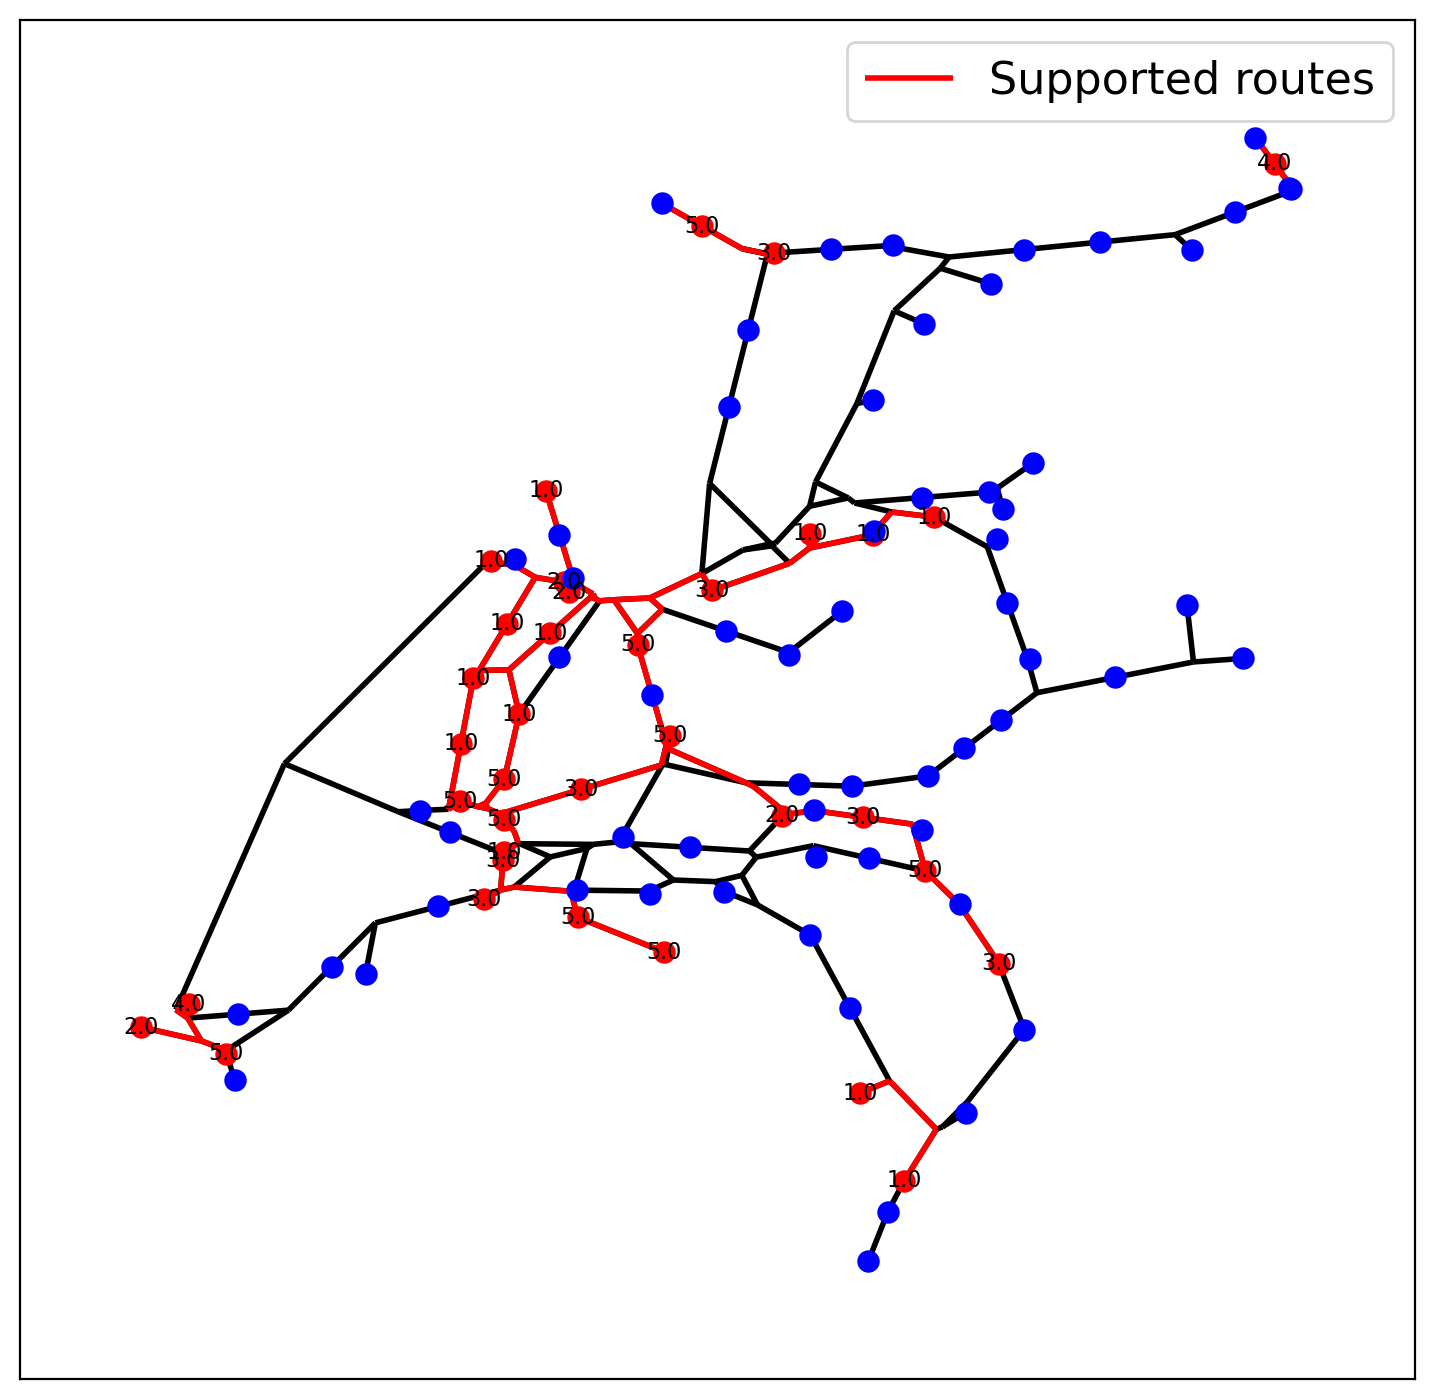

0.16377489921413227

In [12]:
total_flow, supported_fraction, optimal_facilities, non_zero_flows, routes_supported = flow_refueling_location_model(1, 50000, 100, 5, 5, 30, vis=True)
supported_fraction

## range 100km

Optimal


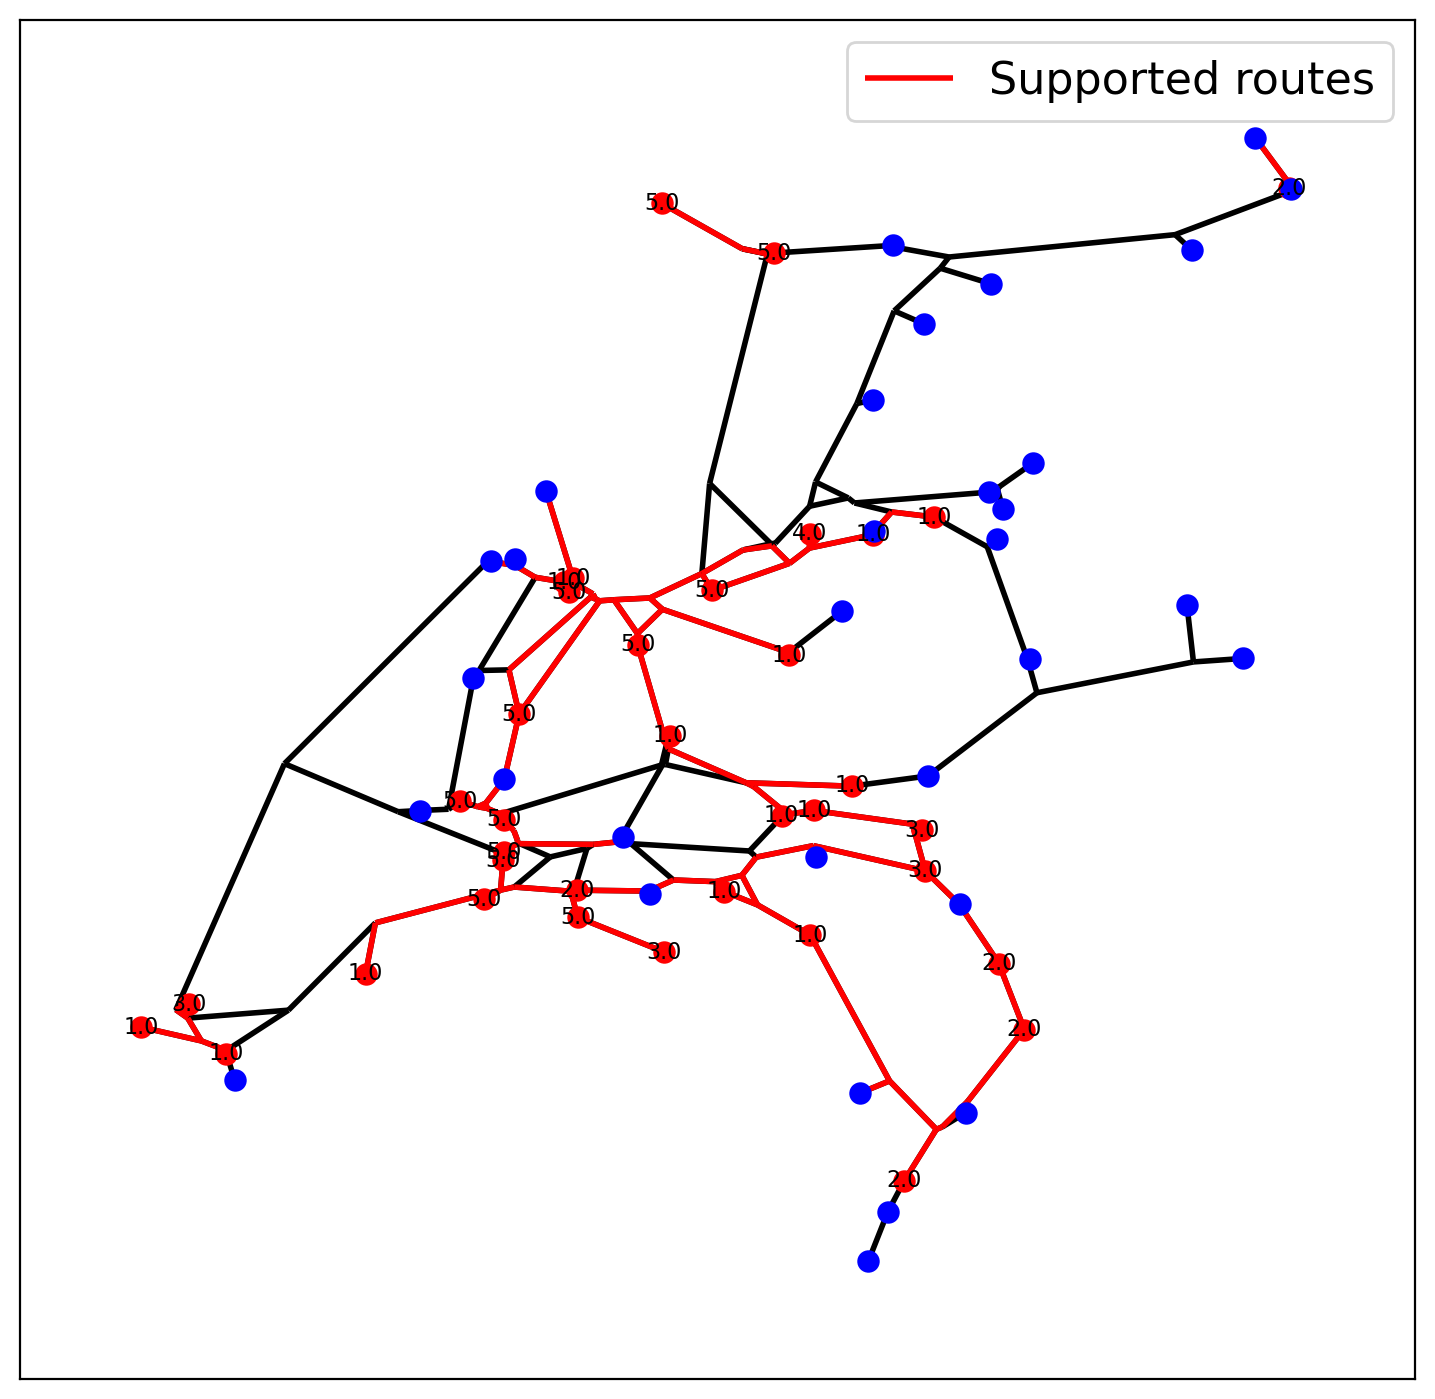

0.2755612194897524

In [13]:
total_flow, supported_fraction, optimal_facilities, non_zero_flows, routes_supported = flow_refueling_location_model(1, 100000, 100, 5, 5, vis=True)
supported_fraction

Optimal


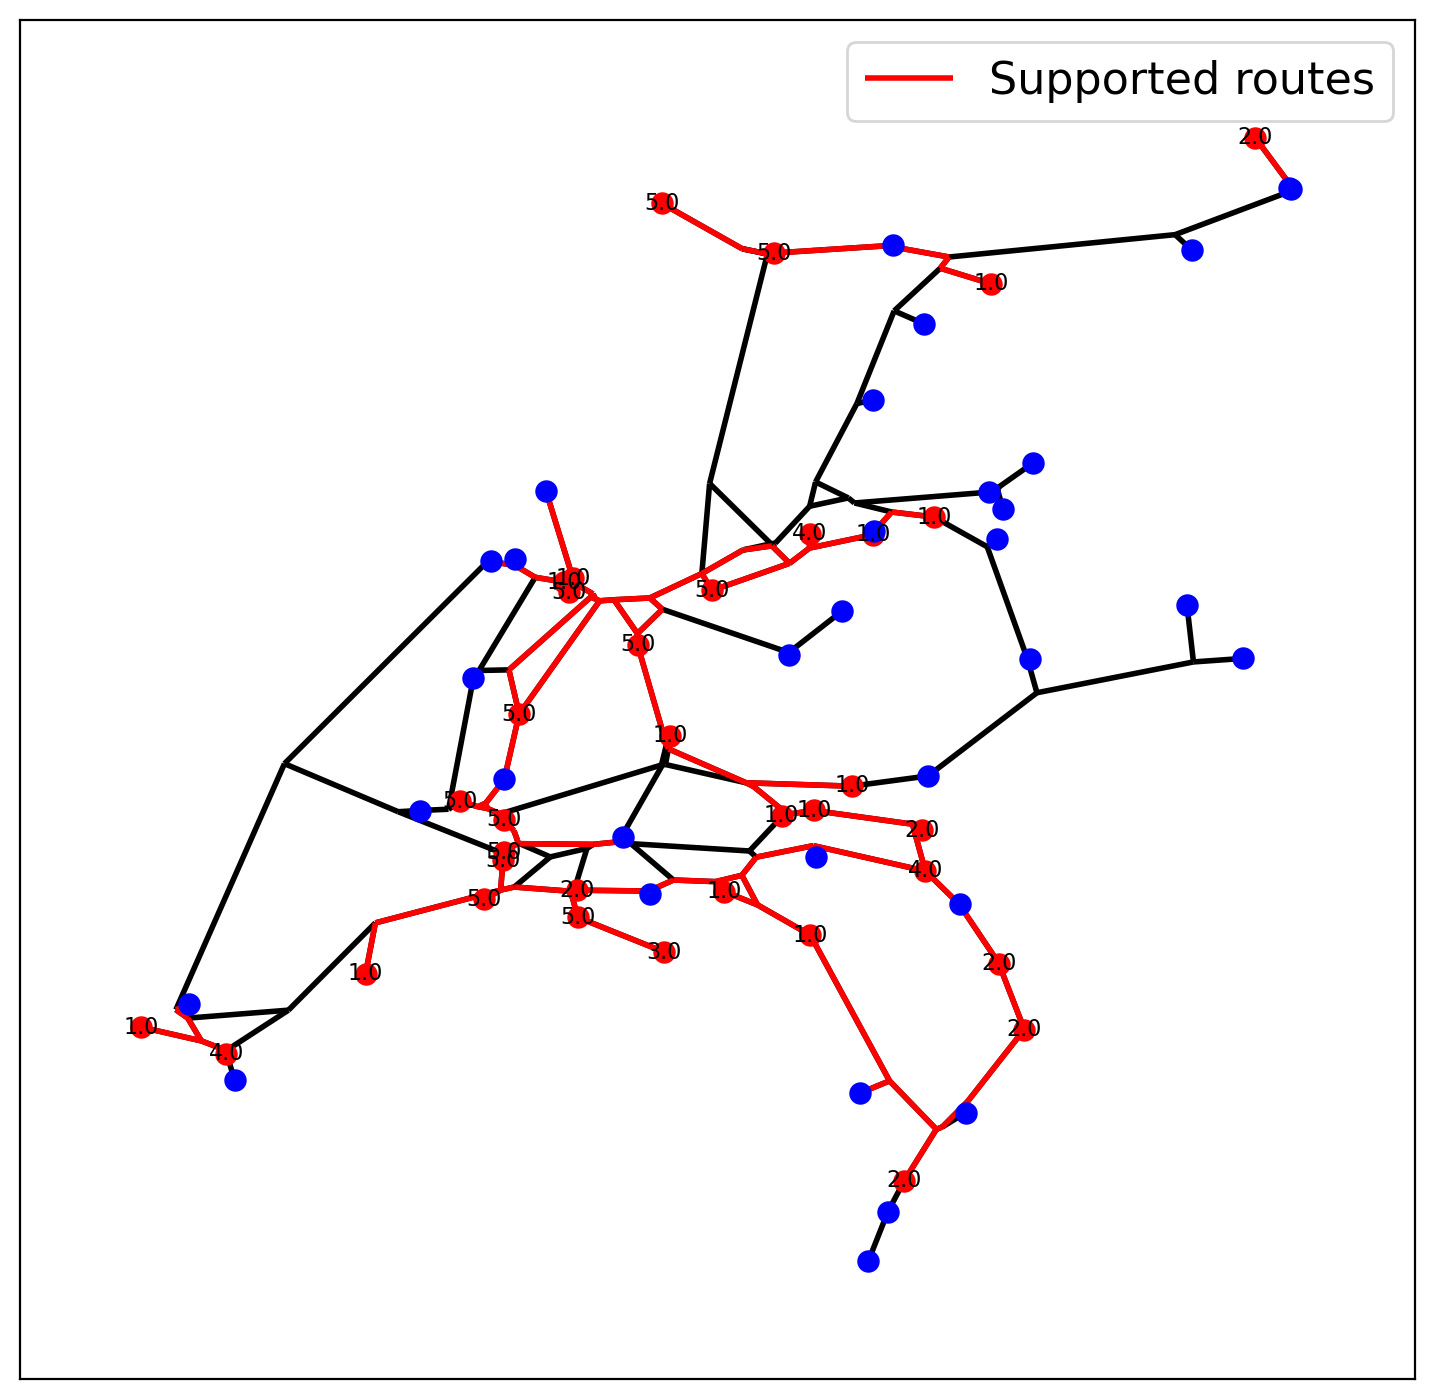

CPU times: total: 9.45 s
Wall time: 11.2 s


0.27445153629652724

In [7]:
import time
%time total_flow, supported_fraction, optimal_facilities, non_zero_flows, routes_supported = flow_refueling_location_model(1, 100000, 100, 5, 5, 0, vis=True)
supported_fraction

In [4]:
optimal_facilities

{'103': 0.0,
 '104': 5.0,
 '105': 1.0,
 '106': 0.0,
 '107': 0.0,
 '108': 0.0,
 '109': 0.0,
 '110': 0.0,
 '111': 0.0,
 '112': 2.0,
 '113': 5.0,
 '114': 0.0,
 '115': 1.0,
 '116': 0.0,
 '117': 0.0,
 '118': 0.0,
 '119': 0.0,
 '120': 0.0,
 '121': 0.0,
 '122': 0.0,
 '123': 0.0,
 '124': 0.0,
 '125': 0.0,
 '126': 0.0,
 '127': 0.0,
 '128': 0.0,
 '129': 0.0,
 '130': 0.0,
 '131': 0.0,
 '132': 0.0,
 '22637863': 2.0,
 '22638146': 2.0,
 '22638156': 0.0,
 '22638320': 0.0,
 '22638327': 3.0,
 '30984595': 5.0,
 '8861305': 0.0,
 '8861462': 0.0,
 '8861528': 0.0,
 '8861625': 0.0,
 '8861718': 0.0,
 '8862085': 0.0,
 '8862497': 0.0,
 '8862506': 0.0,
 '8862570': 0.0,
 '8862663': 5.0,
 '8863019': 0.0,
 '8863125': 0.0,
 '8863152': 0.0,
 '8863207': 0.0,
 '8863260': 1.0,
 '8863306': 5.0,
 '8863360': 4.0,
 '8863408': 0.0,
 '8863469': 5.0,
 '8863518': 0.0,
 '8863614': 2.0,
 '8863709': 3.0,
 '8863818': 5.0,
 '8863861': 0.0,
 '8863966': 0.0,
 '8864005': 5.0,
 '8864018': 0.0,
 '8864111': 0.0,
 '8864153': 0.0,
 '8864494

In [5]:
non_zero_flows

[('NLABL', 'NLRTM', 0),
 ('NLAER', 'NLLEY', 0),
 ('NLAER', 'NLLEY', 0),
 ('NLAER', 'NLRTM', 0),
 ('NLAER', 'NLSWI', 0),
 ('NLALK', 'NLIJM', 0),
 ('NLALK', 'NLIJM', 0),
 ('NLAMS', 'NLAER', 0),
 ('NLAMS', 'NLTIE', 0),
 ('NLAMS', 'NLUTC', 1),
 ('NLAMS', 'NLWMO', 0),
 ('NLAMS', 'NLZAA', 0),
 ('NLDOR', 'NLRTM', 0),
 ('NLDOR', 'NLRTM', 1),
 ('NLDRO', 'NLKAM', 0),
 ('NLFAR', 'NLEEM', 0),
 ('NLGOR', 'NLRTM', 0),
 ('NLHAR', 'NLWTE', 0),
 ('NLHAR', 'NLWTE', 0),
 ('NLHTB', 'NLBON', 0),
 ('NLHTB', 'NLBZM', 0),
 ('NLIJM', 'NLRTM', 1),
 ('NLKGZ', 'NLAMS', 0),
 ('NLKGZ', 'NLZAA', 0),
 ('NLLEY', 'NLAMS', 0),
 ('NLMOE', 'NLOOS', 0),
 ('NLNIJ', 'NLAMS', 0),
 ('NLNIJ', 'NLDRU', 0),
 ('NLNIJ', 'NLDRU', 0),
 ('NLNIJ', 'NLWAS', 0),
 ('NLNIJ', 'NLWAS', 0),
 ('NLNRW', 'NLBON', 0),
 ('NLOOS', 'NLTLB', 0),
 ('NLOOS', 'NLTLB', 0),
 ('NLRTM', 'NLAPN', 0),
 ('NLRTM', 'NLGTB', 1),
 ('NLRTM', 'NLLID', 0),
 ('NLRTM', 'NLMOE', 0),
 ('NLRTM', 'NLMOE', 0),
 ('NLRTM', 'NLMOE', 1),
 ('NLRTM', 'NLOOS', 1),
 ('NLRTM', 'NLOO